# House Price Prediction

## Table of Content

1. [House Price Dataset](#dataset)
    - 1.1 [Loading the data](#read)
    - 1.2 [Dataset info](#info)
    - 1.3 [Visualizing the data](#visualize) <br><br>
2. [PreProcessing](#process)
    - 2.1 [Top 10 best correlating attribute](#attribute)
    - 2.2 [No of label in each categorical variable](#label)
    - 2.3 [Seperate categorical and continious data](#seperate)
    - 2.4 [Feature Engineering](#feature)  <br><br>
3. [Choosing between models](#choosingmodel)
    - 3.1 [Decision Tree](#dt)
    - 3.2 [Training Decision Tree](#tdt)
    - 3.3 [Predict Decision Tree](#pdt)
    - 3.4 [Evolution of Decision Tree](#edt) 
    - 3.5 [Random Forest](#rf)
    - 3.6 [Training Random Forest](#trf)
    - 3.7 [Predict Random Forest](#prf)
    - 3.8 [Evolution of Random Forest](#erf)
    - 3.9 [Randomized Search](#rs)
    - 4.0 [KNN](#knn)<br><br>

# House Prie Dataset <a id='dataset'>

## Loading the data<a id='read'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
your_path="C:/Users/Vivek/house-prices-advanced-regression-techniques/"

In [4]:
train_data=pd.read_csv(your_path+'train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Dataset Info<a id='info'>

In [79]:
import pandas_profiling
report=pandas_profiling.ProfileReport(train_data)
#covert profile report as html file
report.to_file("House_data.html")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\traitlets

<b>Dataset info</b><br>

Number of variables	81<br>
Number of observations	1460<br>
Total Missing (%)	5.9%<br>
Total size in memory	924.0 KiB<br>
Average record size in memory	648.1 B<br>

<b>Variables types</b><br>

Numeric	38<br>
Categorical	43<br>
Boolean	0<br>
Date	0<br>
Text (Unique)	0<br>

<b>Data fields</b><br>
Here's a brief version of what you'll find in the data description file.<br>

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: $Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>


<b>missing values</b><br>

3SsnPorch has 1436 / 98.4% zeros Zeros<br>
Alley has 1369 / 93.8% missing values Missing<br>
BsmtFinSF2 has 1293 / 88.6% zeros Zeros<br>
BsmtHalfBath has 1378 / 94.4% zeros Zeros<br>
EnclosedPorch has 1252 / 85.8% zeros Zeros<br>
Fence has 1179 / 80.8% missing values Missing<br>
LowQualFinSF has 1434 / 98.2% zeros Zeros<br>
MiscFeature has 1406 / 96.3% missing values Missing<br>
MiscVal has 1408 / 96.4% zeros Zeros<br>
PoolArea has 1453 / 99.5% zeros Zeros<br>
PoolQC has 1453 / 99.5% missing values Missing<br>
ScreenPorch has 1344 / 92.1% zeros Zeros<br>
2ndFlrSF has 829 / 56.8% zeros Zeros<br>
TotalBsmtSF has 37 / 2.5% zeros Zeros<br>
OpenPorchSF has 656 / 44.9% zeros Zeros<br>
WoodDeckSF has 761 / 52.1% zeros Zeros<br>
BsmtFinType1 has 37 / 2.5% missing values Missing<br>
BsmtFinType2 has 38 / 2.6% missing values Missing<br>
BsmtCond has 37 / 2.5% missing values Missing<br>
BsmtExposure has 38 / 2.6% missing values Missing<br>
BsmtFinSF1 has 467 / 32.0% zeros Zeros<br>
BsmtFullBath has 856 / 58.6% zeros Zeros<br>
BsmtQual has 37 / 2.5% missing values Missing<br>
BsmtUnfSF has 118 / 8.1% zeros Zeros<br>
FireplaceQu has 690 / 47.3% missing values Missing<br>
Fireplaces has 690 / 47.3% zeros Zeros<br>
GarageArea has 81 / 5.5% zeros Zeros<br>
GarageCars has 81 / 5.5% zeros Zeros<br>
GarageCond has 81 / 5.5% missing values Missing<br>
GarageFinish has 81 / 5.5% missing values Missing<br>
GarageQual has 81 / 5.5% missing values Missing<br>
GarageType has 81 / 5.5% missing values Missing<br>
GarageYrBlt has 81 / 5.5% missing values Missing<br>
HalfBath has 913 / 62.5% zeros Zeros<br>
LotFrontage has 259 / 17.7% missing values Missing<br>
MasVnrArea has 861 / 59.0% zeros Zeros<br>

In [60]:
# environment settings: 
#pd.set_option('display.max_column',None)
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_seq_items',None)
#pd.set_option('display.max_colwidth', 500)
#pd.set_option('expand_frame_repr', True)

## Visualize the data<a id='visualize'>

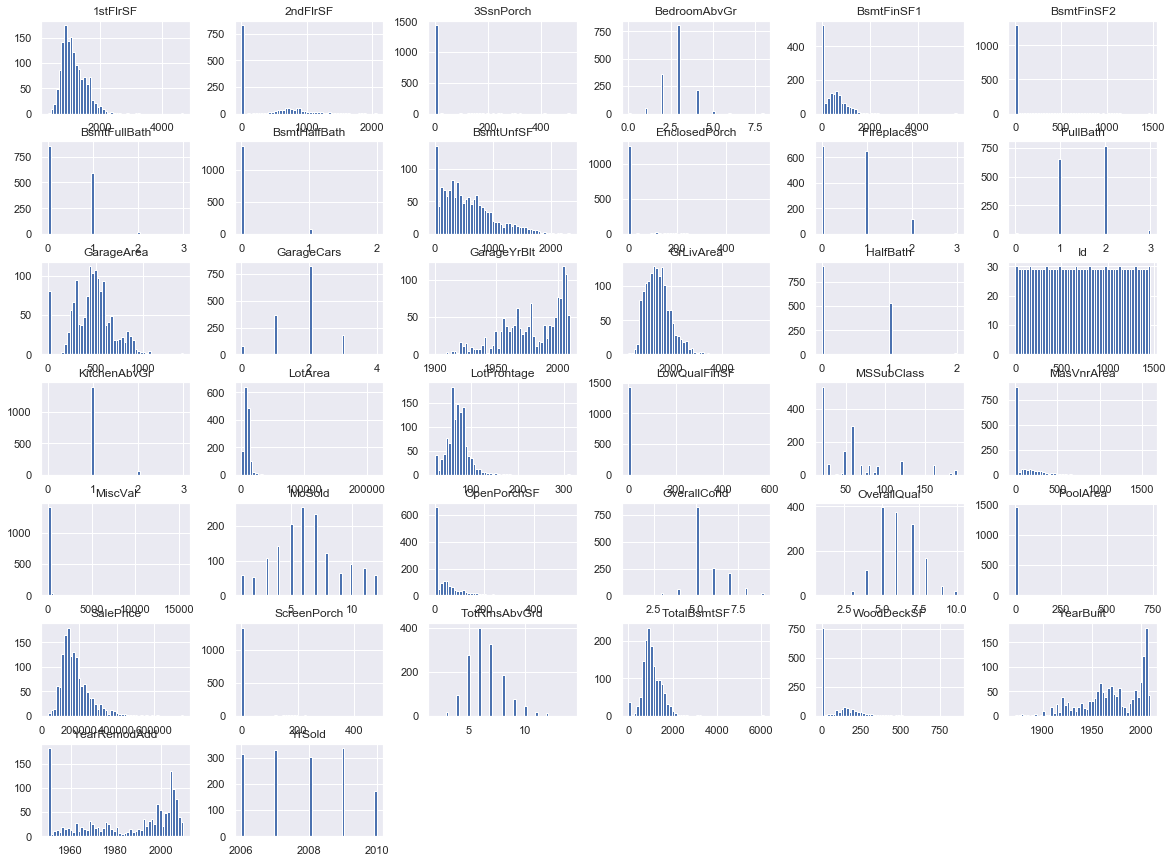

In [128]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

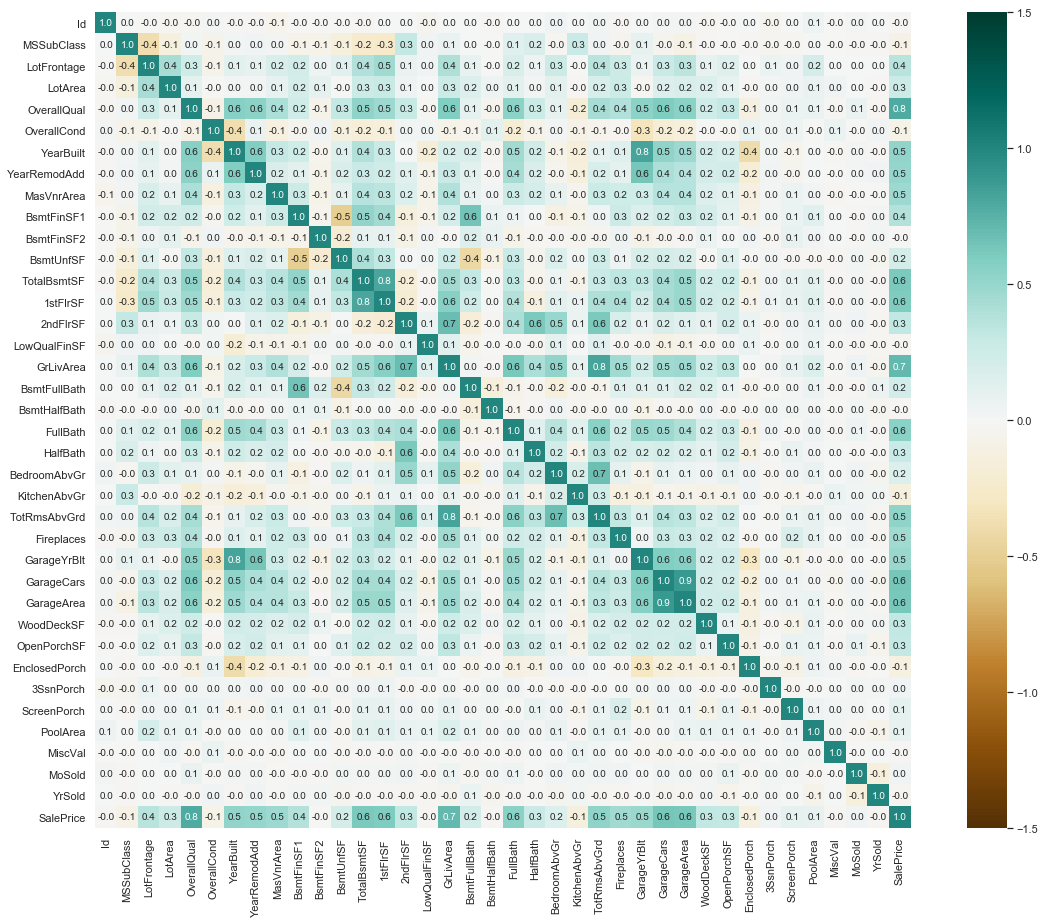

In [129]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train_data.corr(),vmax=1.5,vmin=-1.5,cmap="BrBG",square=True,annot=True,fmt='0.1f')

In [130]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Preprocessing/Cleaning of Data<a id='process'>

In [7]:
#SalePrice is strongly correlated with OverallQual, GrLivArea
#YearBuilt is strongly correlated to GarageYrBlt-we will consider YearBuilt as it has no missing values and zeros
#TotalBsmtSF and 1stFlrSF-we will consider 1stFlrSF as it has no missing values and zeros
#GrLivArea and TotRmsAbvGrd-we will consider GrLivArea as it has no missing values and zeros
#2ndFlrSF and GrLivArea-we will consider GrLivArea as it has no missing values and zeros
#BedroomAbvGr and TotRmsAbvGrd-we will consider GrLivArea as it has no missing values and zeros
# GarageCars and GarageArea-we will consider GarageArea as it has good distribution

# we will neglect Alley, Fence, MiscFeature, PoolQC as they have more than 90% missing values 
# we will neglect BsmtFinSF2, 3SsnPorch, BsmtHalfBath, EnclosedPorch, LowQualFinSF, MiscVal, PoolArea, ScreenPorch as they have more than 90%zeros
# we will neglect 2ndFlrSF, WoodDeckSF, BsmtFullBath,HalfBath, MasVnrArea, FireplaceQu, Fireplaces, OpenPorchSF as it has more than 50% zeros or missing values

# LotFrontage has 259 / 17.7% missing values Missing
# BsmtFinSF1 has 467 / 32.0% zeros Zeros
# so we are left with YearBuilt, 1stFlrSF, GrLivArea, GarageArea, 
        
# exclude columns you don't want
train_data_selected=train_data[train_data.columns[~train_data.columns.isin(['Alley', 'Fence', 'MiscFeature', 'PoolQC','BsmtFinSF2',
                                                                            '3SsnPorch', 'BsmtHalfBath', 'EnclosedPorch', 'LowQualFinSF', 
                                                                            'MiscVal', 'PoolArea', 'ScreenPorch','GarageYrBlt','TotalBsmtSF',
                                                                           'TotRmsAbvGrd','BedroomAbvGr','GarageCars','2ndFlrSF','Id',
                                                                           'WoodDeckSF', 'BsmtFullBath', 'HalfBath', 'MasVnrArea', 
                                                                            'FireplaceQu', 'Fireplaces', 'OpenPorchSF','LotFrontage',
                                                                           'BsmtFinSF1'])]]
print(train_data_selected.columns)
print(train_data_selected.shape)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')
(1460, 53)


## Top 10 Best Correlating attributes<a id='attribute'>

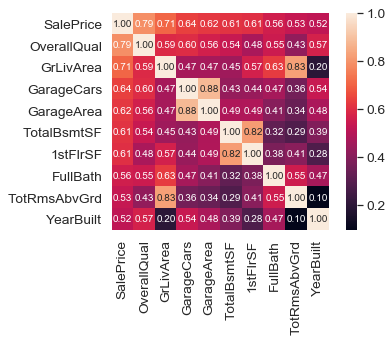

In [41]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat=train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

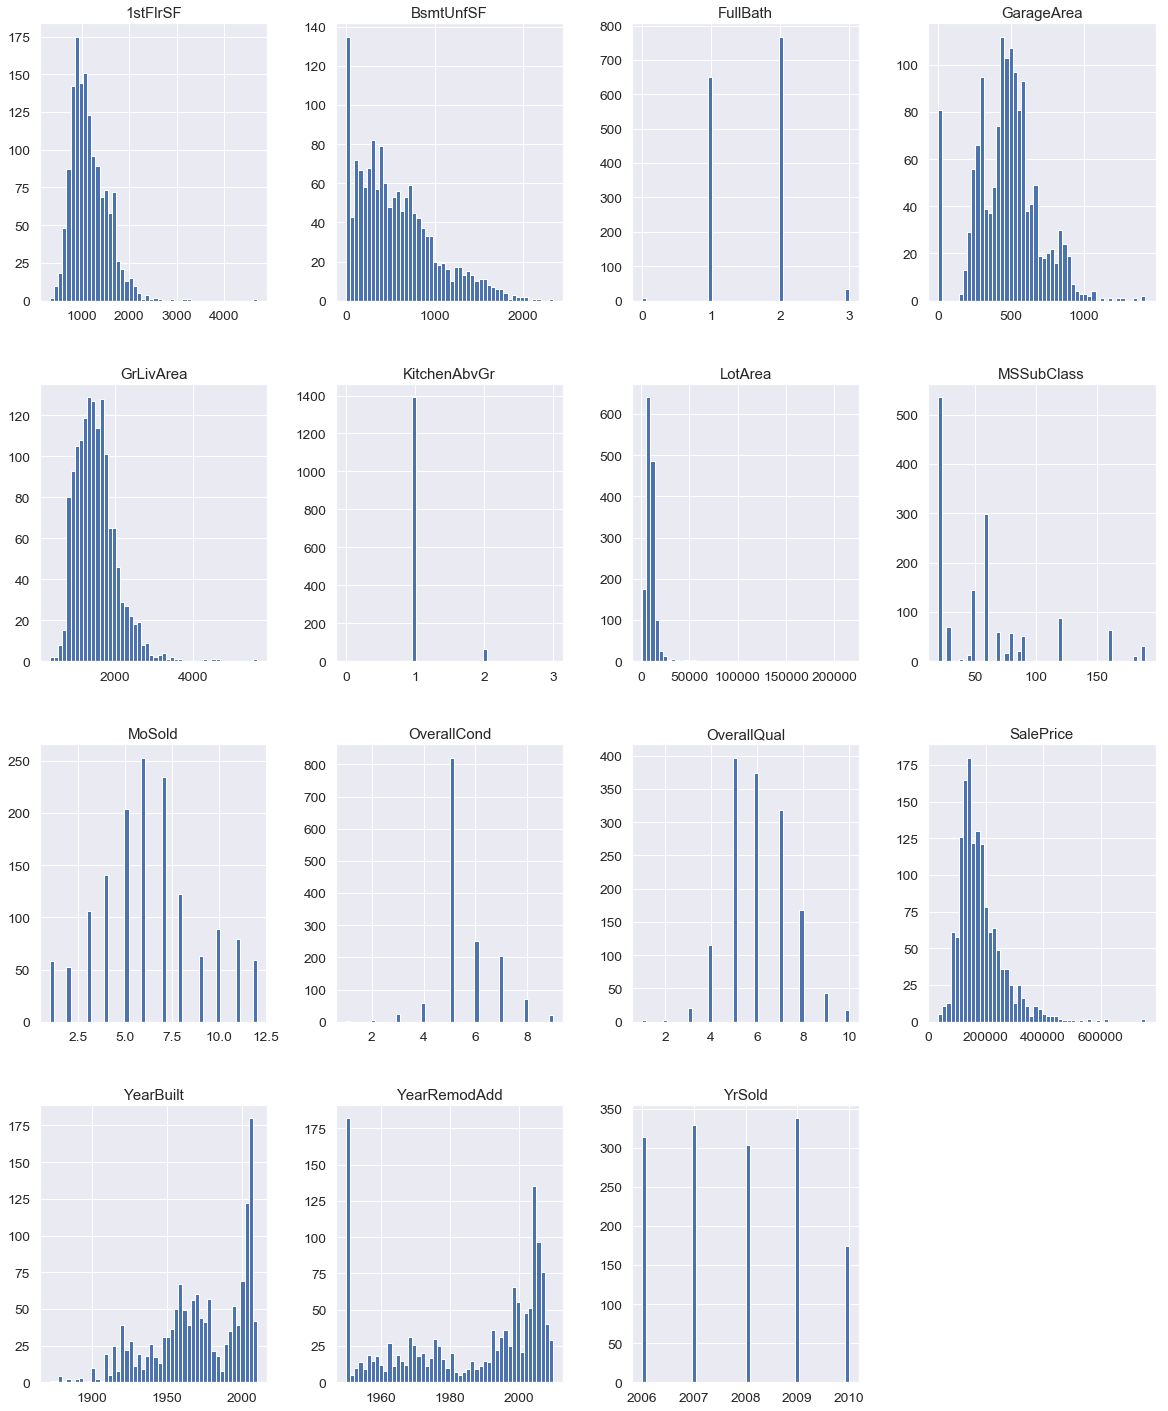

In [42]:
train_data_selected.hist(bins=50, figsize=(20,25))
plt.show()

## find the number of label in each categorical variable<a id='label'>

In [43]:
train_data_selected.head(500)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,548,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,460,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,608,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,642,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,836,TA,TA,Y,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,480,TA,TA,Y,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,RFn,636,TA,TA,Y,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,RFn,484,TA,TA,Y,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,Unf,468,Fa,TA,Y,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,RFn,205,Gd,TA,Y,1,2008,WD,Normal,118000


In [44]:
print(train_data_selected['MSZoning'].unique())
print(train_data_selected['Street'].unique())
print(train_data_selected['LotShape'].unique())
print(train_data_selected['LandContour'].unique())
print(train_data_selected['Utilities'].unique())
print(train_data_selected['LotConfig'].unique())
print(train_data_selected['LandSlope'].unique())
print(train_data_selected['Neighborhood'].unique())
print(train_data_selected['Condition1'].unique())
print(train_data_selected['Condition2'].unique())
print(train_data_selected['BldgType'].unique())
print(train_data_selected['HouseStyle'].unique())
print(train_data_selected['RoofStyle'].unique())
print(train_data_selected['RoofMatl'].unique())
print(train_data_selected['Exterior1st'].unique())
print(train_data_selected['Exterior2nd'].unique())
print(train_data_selected['MasVnrType'].unique())
print(train_data_selected['ExterQual'].unique())
print(train_data_selected['ExterCond'].unique())
print(train_data_selected['Foundation'].unique())
print(train_data_selected['BsmtQual'].unique())
print(train_data_selected['BsmtCond'].unique())
print(train_data_selected['BsmtExposure'].unique())
print(train_data_selected['BsmtFinType1'].unique())
print(train_data_selected['BsmtFinType2'].unique())
print(train_data_selected['Heating'].unique())
print(train_data_selected['HeatingQC'].unique())
print(train_data_selected['CentralAir'].unique())
print(train_data_selected['Electrical'].unique())
print(train_data_selected['KitchenQual'].unique())
print(train_data_selected['Functional'].unique())
print(train_data_selected['GarageType'].unique())
print(train_data_selected['GarageFinish'].unique())
print(train_data_selected['GarageQual'].unique())
print(train_data_selected['GarageCond'].unique())
print(train_data_selected['PavedDrive'].unique())
print(train_data_selected['SaleType'].unique())
print(train_data_selected['SaleCondition'].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [45]:
train_data_selected.describe(include='all')

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,...,1379,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,2,4,4,2,5,3,25,...,3,NaN,5,5,3,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,NaN,TA,TA,Y,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,1454,925,1311,1459,1052,1382,225,...,605,NaN,1311,1326,1340,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,472.980137,NaN,NaN,NaN,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,213.804841,NaN,NaN,NaN,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,334.500000,NaN,NaN,NaN,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,480.000000,NaN,NaN,NaN,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,576.000000,NaN,NaN,NaN,8.000000,2009.000000,NaN,NaN,214000.000000


## seperate categerical and continious data <a id ='seperate'>

In [46]:
train_data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non

In [8]:
#create a separate DataFrame consisting of only these categorical features
cat_df = train_data_selected.select_dtypes(include=['object']).copy()
#Let's also check the column-wise distribution of null values:
print(cat_df.isnull().sum())

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64


In [9]:
#create a separate DataFrame consisting of only these continious features
num_df = train_data_selected.select_dtypes(include=['int64']).copy()
#Let's also check the column-wise distribution of null values:
print(num_df.isnull().sum())

MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtUnfSF       0
1stFlrSF        0
GrLivArea       0
FullBath        0
KitchenAbvGr    0
GarageArea      0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64


In [10]:
#method .value_counts() returns the frequency distribution of each category in the feature
#Then selecting the top category, which is the mode, with the .index attribute.
cat_df_fillna = cat_df.fillna(cat_df['GarageType'].value_counts().index[0])
cat_df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     14

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


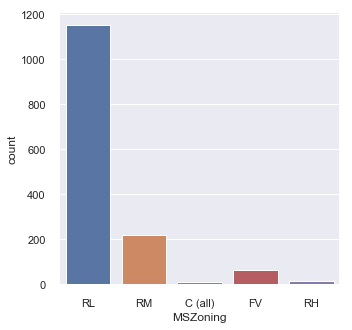

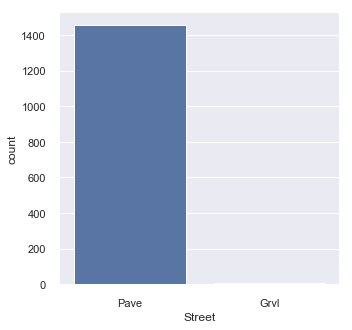

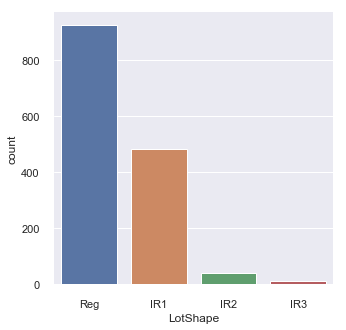

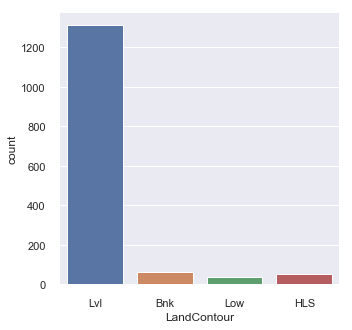

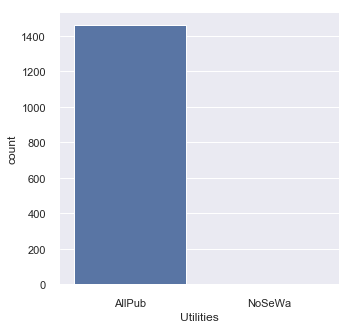

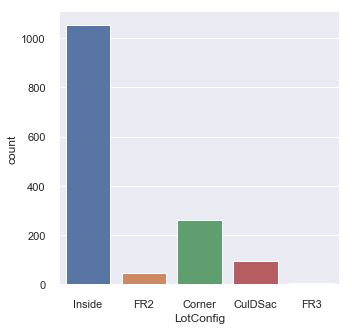

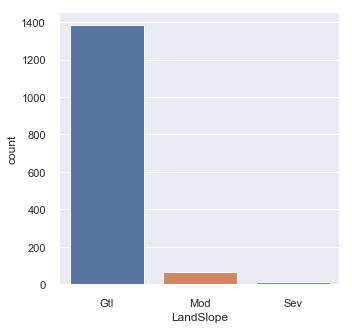

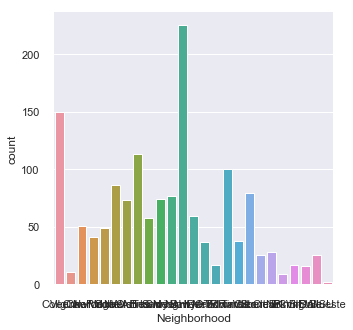

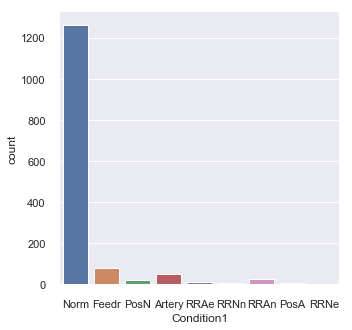

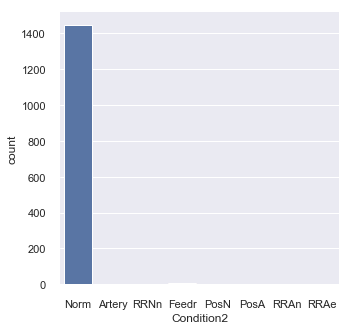

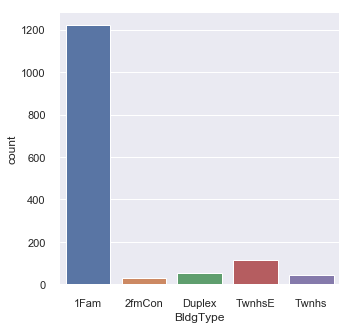

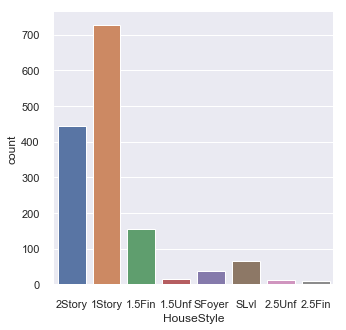

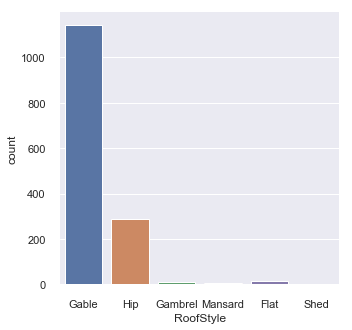

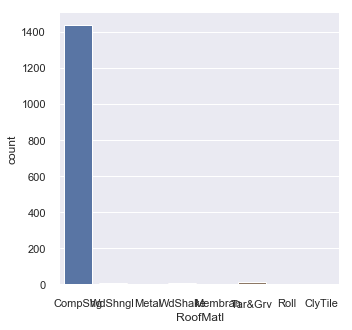

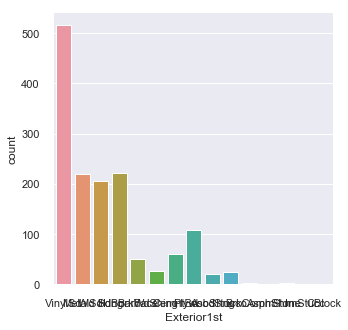

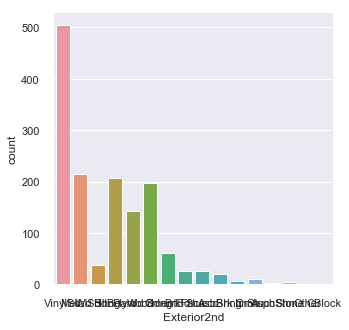

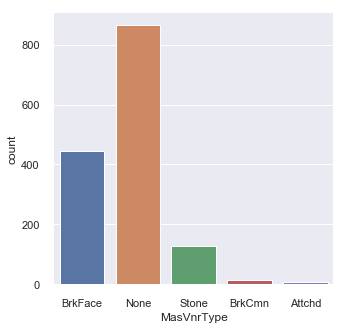

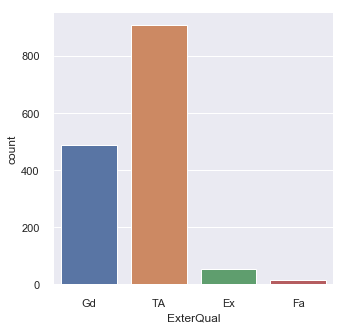

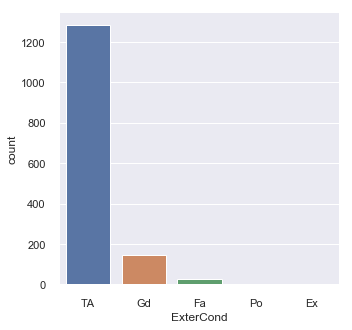

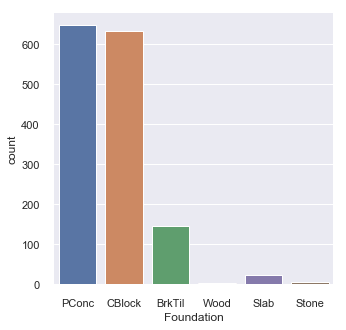

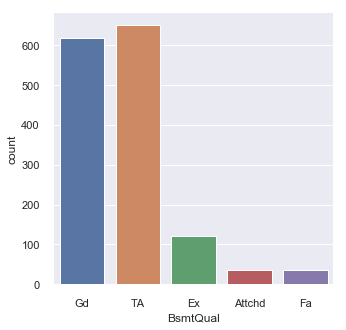

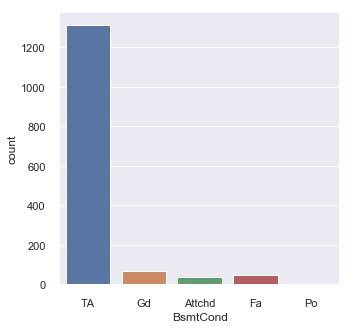

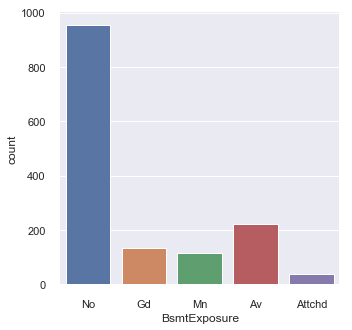

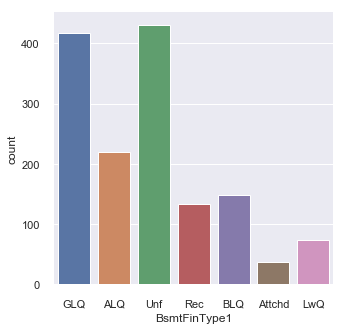

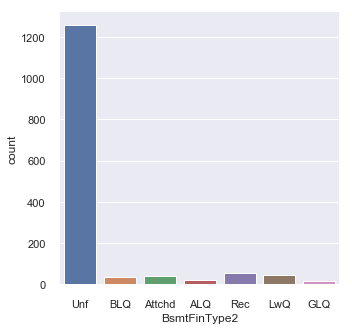

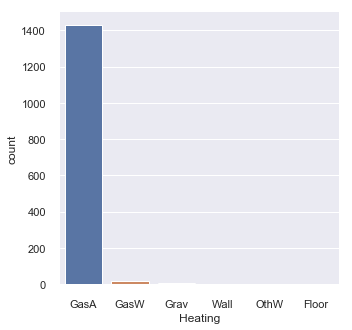

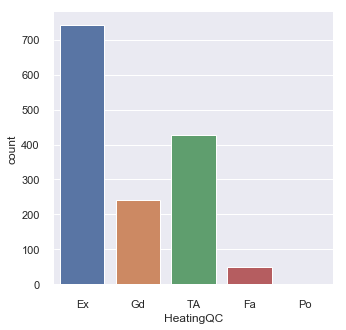

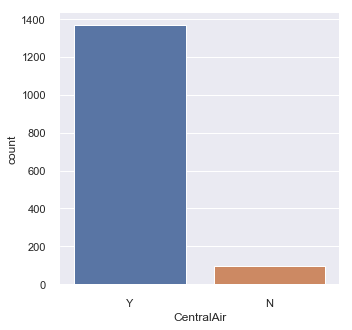

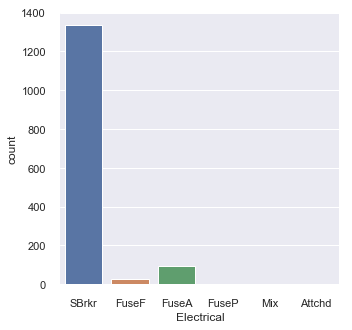

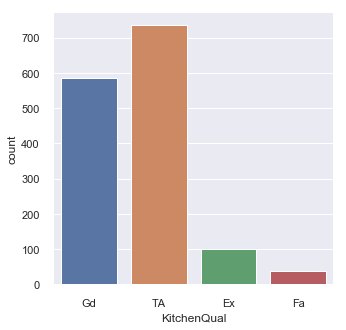

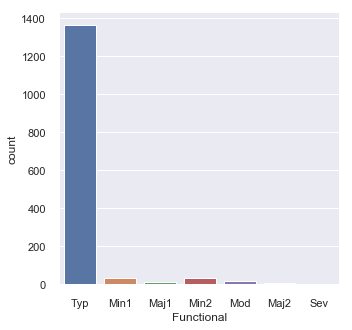

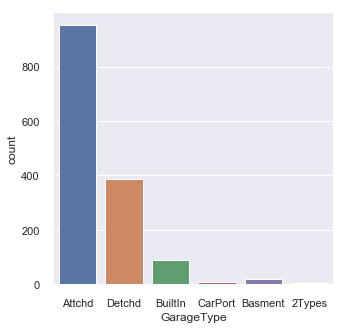

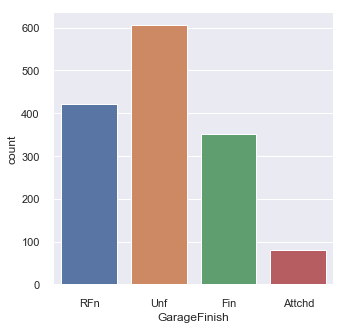

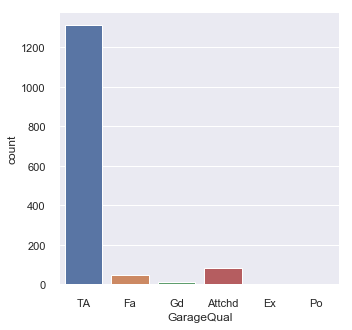

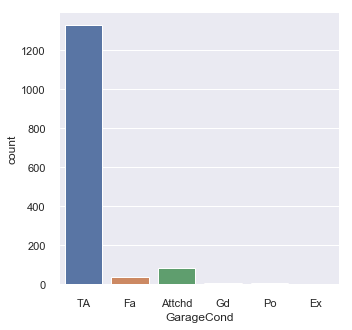

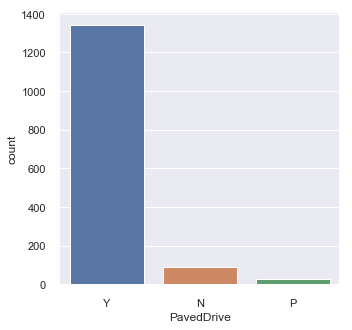

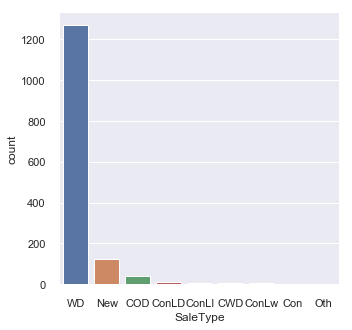

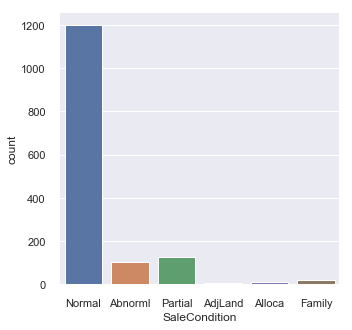

In [11]:
for col in cat_df_fillna:
    sns.set()
    fig,ax=plt.subplots()
    sns.countplot(x=col, data=cat_df_fillna)
    sns.despine(offset=5,trim=True)
    fig.set_size_inches(5,5)

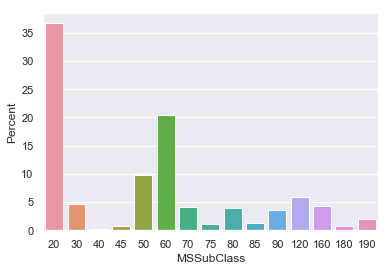

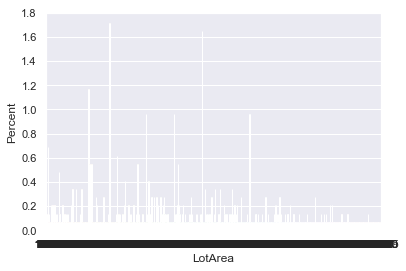

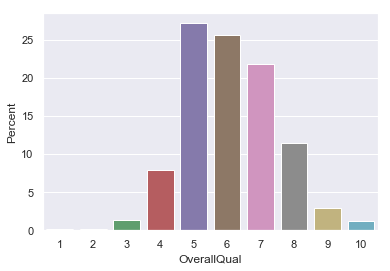

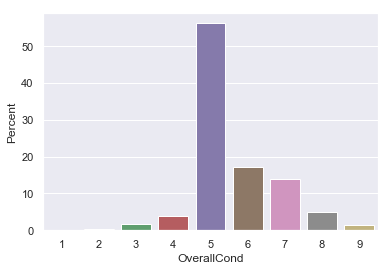

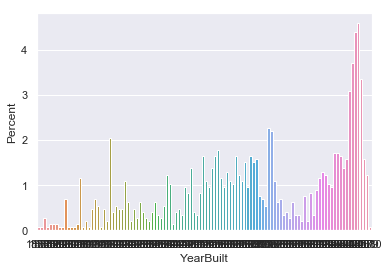

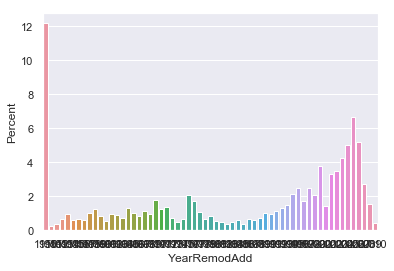

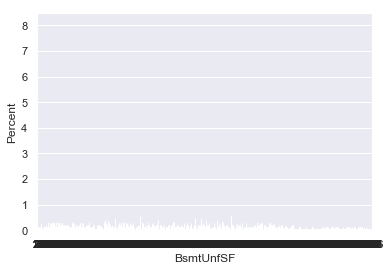

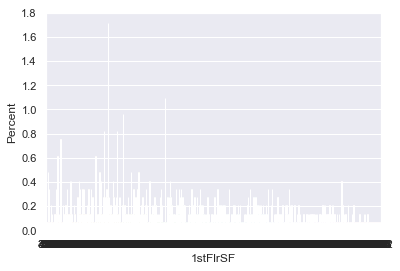

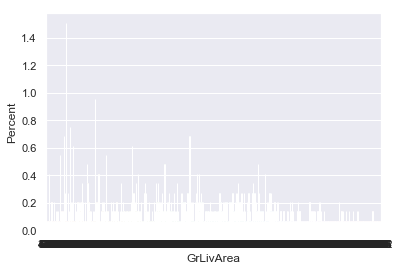

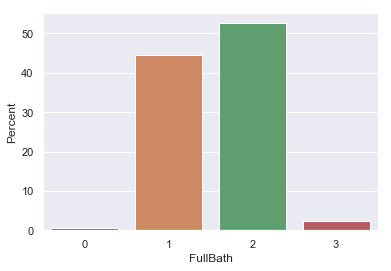

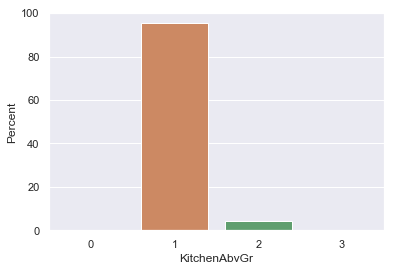

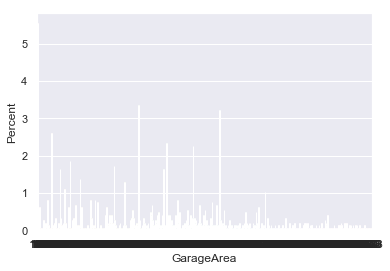

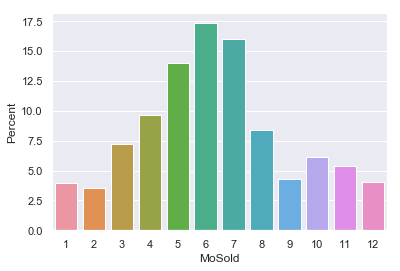

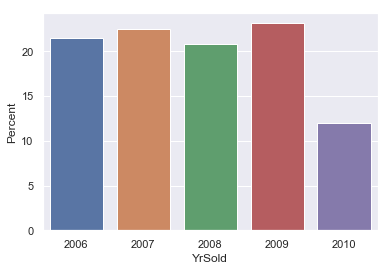

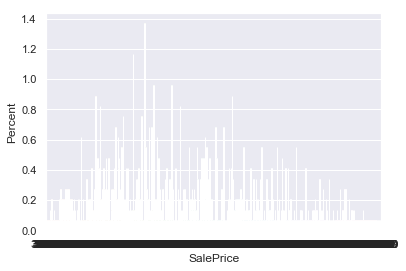

In [79]:
for col in num_df:
    fig,ax=plt.subplots()
    ax=sns.barplot(x=col,y=col,data=num_df,estimator=lambda x:len(x)/len(num_df)*100)
    ax.set(ylabel='Percent')

In [12]:
#from above plot it is clear that street, utilities, condition2, heating, functional columns are having less variation in data 
#so we will drop them from categorical list
cat_df_fillna=cat_df_fillna[cat_df_fillna.columns[~cat_df_fillna.columns.isin(['Street', 'Utilities', 'Condition2', 'Heating', 'Functional'])]]

#neglect BsmtUnfSF since having low variation in data
num_df=num_df[num_df.columns[~num_df.columns.isin(['BsmtUnfSF'])]]
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
MSSubClass      1460 non-null int64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
1stFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
KitchenAbvGr    1460 non-null int64
GarageArea      1460 non-null int64
MoSold          1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(14)
memory usage: 159.8 KB


## Feature Engineering<a id ='feature'>

In [13]:
cat_cols = pd.get_dummies(cat_df_fillna, drop_first=True)
cat_cols.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [14]:
dataset = pd.concat([num_df,cat_cols], axis=1 )
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 200 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(14), uint8(186)
memory usage: 425.0 KB
None


# Choosing Between Models <a id='choosingmodel'>

#since there is more number of features so we will go for DT or RF models instead of LR,
#since LR suffer from curse of dimentionality for more dimentions, since they have capability to priotirize the features


# Decision Tree<a id='dt'>

In [60]:
y = dataset["SalePrice"].values
X = dataset.drop(['SalePrice'], axis=1)

In [61]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [62]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_one = tree.DecisionTreeRegressor(criterion="mse",splitter="best",min_samples_split=3, max_depth=5, random_state=101)
my_tree_one

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=101, splitter='best')

## Training Decision Tree Model<a id='tdt'>

In [63]:
# Fit the decision tree model on your features and label

my_tree_one = my_tree_one.fit(X_train, y_train)

In [64]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(X_train.columns,my_tree_one.feature_importances_))

[('MSSubClass', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.682560940103249),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.008259050027492753),
 ('YearRemodAdd', 0.0),
 ('1stFlrSF', 0.11864825419250723),
 ('GrLivArea', 0.0822747834623682),
 ('FullBath', 0.0),
 ('KitchenAbvGr', 0.0),
 ('GarageArea', 0.028759993909737047),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', 0.0),
 ('LandSlope_Mod', 0.0),
 ('LandSlope_Sev', 0.0),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', 0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', 0.0),
 ('Neighborhood_Gilbe

In [65]:
# The accuracy of the model on Train data

print(my_tree_one.score(X_train, y_train))

# The accuracy of the model on Test data

print(my_tree_one.score(X_test, y_test))

0.8672457332912448
0.5992716583230635


In [66]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=X_train.columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz
from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot 

ModuleNotFoundError: No module named 'graphviz'

## Predict Decision Tree Model<a id ='pdt'>

In [67]:
y_pred = my_tree_one.predict(X_test)

## Evaluation of Decision Tree Model<a id='edt'>

testing on training data
RSquare: 0.8672457332912448
Adjusted RSquare: 0.8330747508694287
RMSE: 29196.606370697347
RMSLE:  0.17027260881655754
rmse:  0.17027260881655762
testing on test data
RMSE: 49324.354024942324
RMSLE:  0.22042572281797002
since test rmse is more than 10% of train rmse so model is overfitted


Text(0,0.5,'Predicted')

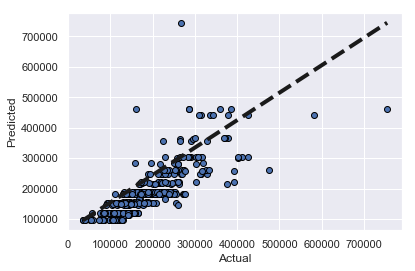

In [68]:
from sklearn.metrics import mean_squared_error,r2_score


#define root mean square log error-we take log of predicted and actual values, so basically what changes is 
#variance that you are measuring, RMSE is used when both predicted and actual values are huge number
#if both predicted and actual values are small number: RMSE and RMSLE is same
def RMSLE(y,pred):
    return np.sqrt(mean_squared_error(np.log1p(y+1),np.log1p(pred+1)))

def rmsle(y,y_pred):
    assert len(y)==len(y_pred)
    terms_to_sum=[(np.log1p(y_pred[i]+1)-np.log1p(y[i]+1))**2 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum)/len(y))**0.5

y_train_pred=my_tree_one.predict(X_train)
rsquare=r2_score(y_train,y_train_pred)
colcount=dataset.columns.size
n=len(X_train)
train_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("testing on training data")
print("RSquare: "+(str)(rsquare))
print("Adjusted RSquare: "+(str)(1-(1-rsquare)*(n-1)/(n-colcount-1)))
print("RMSE: "+str(train_rmse))
print("RMSLE: ",RMSLE(y_train, y_train_pred))
print("rmse: ",rmsle(y_train, y_train_pred))

print("testing on test data")
print("RMSE: "+str(test_rmse))
print("RMSLE: ",RMSLE(y_test, y_pred))

if rmsle(y_train, y_train_pred)*1.1 < RMSLE(y_test, y_pred):
    print("since test rmse is more than 10% of train rmse so model is overfitted")
else:
     print("since test rmse is less than 10% of train rmse so model is ok")
        
#lets check the goodness of fit with the prediction visualized as line
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')



## Grid Search<a id='gs'>

In [69]:
# Different parameters we want to test

max_depth = [3,5,7,10,12,15] 
splitter=['best','random']
min_samples_split=[2,3,4,5,6]
min_samples_leaf = [1, 2, 4]

# Importing GridSearch

from sklearn.model_selection import GridSearchCV

# Building the model

my_tree_three = tree.DecisionTreeRegressor()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=5, 
                    param_grid = dict(max_depth = max_depth, splitter=splitter,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf))

grid.fit(X_train,y_train)

# Best accuracy score

print(grid.best_score_)

# Best parameters for the model

print(grid.best_params_)

0.7492666053284136
{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'best'}


In [70]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeRegressor(criterion="mse",splitter="best",min_samples_split=6, max_depth=10,min_samples_leaf=2, random_state=101)
my_tree_three.fit(X_train,y_train)
# Accuracy Score for new model

my_tree_three.score(X_train,y_train)

0.9669368895260884

In [71]:
y_pred = my_tree_three.predict(X_test)
# The accuracy of the model on Test data

print(my_tree_three.score(X_test, y_test))

0.6656640650328514


## Random Forest<a id='rf'>

In [72]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(criterion = 'mse',  n_estimators = 100, max_depth = 10, random_state = 101)

## Training Random Forest Model<a id='trf'>

In [73]:
# Fitting the model on Train Data

my_forest = forest.fit(X_train, y_train)

In [74]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(X_train, y_train))

0.974016212138003


## Prediction from Random Forest Model<a id='prf'>

In [75]:
# Making predictions

y_pred = my_forest.predict(X_test)

# The accuracy of the model on Test data

print(my_forest.score(X_test, y_test))

0.8320427947378041


In [76]:
list(zip(X_train.columns,my_forest.feature_importances_))

[('MSSubClass', 0.0031027297762274255),
 ('LotArea', 0.026226379634892872),
 ('OverallQual', 0.6025723280847729),
 ('OverallCond', 0.004113444025401914),
 ('YearBuilt', 0.01710157178193846),
 ('YearRemodAdd', 0.010867434383328045),
 ('1stFlrSF', 0.08013411877045891),
 ('GrLivArea', 0.10991826764732288),
 ('FullBath', 0.017592164758056514),
 ('KitchenAbvGr', 0.00029832568562039916),
 ('GarageArea', 0.03439794760497521),
 ('MoSold', 0.0053847708900723774),
 ('YrSold', 0.0025766165491099267),
 ('MSZoning_FV', 0.00010991355928465607),
 ('MSZoning_RH', 9.864049658299327e-06),
 ('MSZoning_RL', 0.0005114561772930099),
 ('MSZoning_RM', 0.0011473867052002968),
 ('LotShape_IR2', 0.001090662298445846),
 ('LotShape_IR3', 5.498800592121636e-05),
 ('LotShape_Reg', 0.0027620735082708315),
 ('LandContour_HLS', 0.00036989477782513737),
 ('LandContour_Low', 0.00032146465158246727),
 ('LandContour_Lvl', 0.0012516365554488085),
 ('LotConfig_CulDSac', 0.001355646101642942),
 ('LotConfig_FR2', 0.00024883525

## Evaluation of Random Forest Model<a id='erf'>

testing on training data
RSquare: 0.974016212138003
Adjusted RSquare: 0.9673279784540914
RMSE: 12916.931652506695
RMSLE:  0.07154668982224198
rmse:  0.07154668982224192
testing on test data
RMSE: 31932.704081109907
RMSLE:  0.16028476714873177
since test rmse is more than 10% of train rmse so model is overfitted


Text(0,0.5,'Predicted')

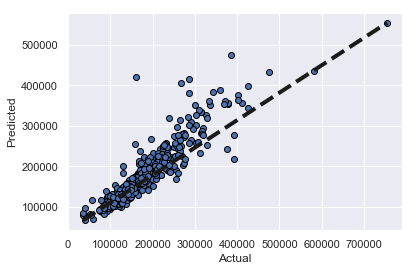

In [77]:
from sklearn.metrics import mean_squared_error,r2_score

y_train_pred=my_forest.predict(X_train)
rsquare=r2_score(y_train,y_train_pred)
colcount=dataset.columns.size
n=len(X_train)
train_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("testing on training data")
print("RSquare: "+(str)(rsquare))
print("Adjusted RSquare: "+(str)(1-(1-rsquare)*(n-1)/(n-colcount-1)))
print("RMSE: "+str(train_rmse))
print("RMSLE: ",RMSLE(y_train, y_train_pred))
print("rmse: ",rmsle(y_train, y_train_pred))

print("testing on test data")
print("RMSE: "+str(test_rmse))
print("RMSLE: ",RMSLE(y_test, y_pred))

if rmsle(y_train, y_train_pred)*1.1 < RMSLE(y_test, y_pred):
    print("since test rmse is more than 10% of train rmse so model is overfitted")
else:
     print("since test rmse is less than 10% of train rmse so model is ok")
        
#lets check the goodness of fit with the prediction visualized as line
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')



## Randomized Search<a id='rs'>

In [ ]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

forest_two = RandomForestRegressor()

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

rf_random.fit(X_train,y_train)

print(rf_random.best_params_)

print(rf_random.best_score_)

## K Nearest Neighbour<a id='knn'>

In [86]:
#Preprocessing- scaling the feature is important factor for KNN
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

x_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(x_train_scaled)

x_test_scaled=scaler.fit_transform(X_test)
X_test=pd.DataFrame(x_test_scaled)



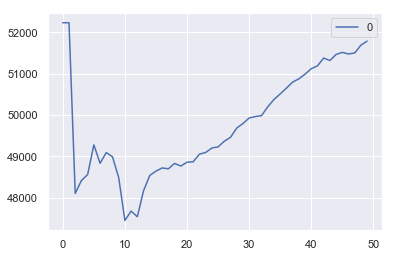

In [34]:
#let us have a look at error rate for diffrent k values

from sklearn import neighbors

def rmse_knn(k):
    if(k==0):
        k=1
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error=np.sqrt(mean_squared_error(y_test,pred))
    return error

rmse_val=[]
for k in range(50):
    rmse_val.append(rmse_knn(k))
    
curve=pd.DataFrame(rmse_val)
curve.plot()

In [35]:
#from plot it is clear that  lowest rmse is achived when k = 10
#increasing k also increases biasness and decrease variance in knn
# incase of noisy data increase the value of k for best prediction
#the time taken by any value of k in knn for predicting class for test data is same
#in Knn it is very likely to overfit due to curse of dimentionality so we will use PCA and feature selection to overcome this
#Euclidean distance x^2+y^2, Manhattan distance y2-y1+x2-x1 both used for continious variable
#Euclidean distance treats each feature as equally important
#Hamming distance= sum(x-y) , if x=y-> D=0 else D=1, used for categorical variable
#let us also implement gridsearchcv
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
weights=['uniform','distance']

params={'n_neighbors':[2,3,4,5,6,7,8,9],'algorithm':algorithm,'weights':weights}
knn=neighbors.KNeighborsRegressor()
model=GridSearchCV(knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_


{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [36]:
model=neighbors.KNeighborsRegressor(n_neighbors=9,algorithm='auto',weights='distance')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

## Evaluation of KNN

testing on training data
RSquare: 1.0
Adjusted RSquare: 1.0
RMSE: 0.0
RMSLE:  0.0
rmse:  0.0
testing on test data
RMSE: 47888.955118497055
RMSLE:  0.23988183895403392
since test rmse is more than 10% of train rmse so model is overfitted


Text(0,0.5,'Predicted')

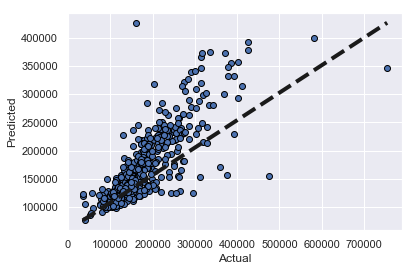

In [37]:
from sklearn.metrics import mean_squared_error,r2_score

y_train_pred=model.predict(X_train)
rsquare=r2_score(y_train,y_train_pred)
colcount=dataset.columns.size
n=len(X_train)
train_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("testing on training data")
print("RSquare: "+(str)(rsquare))
print("Adjusted RSquare: "+(str)(1-(1-rsquare)*(n-1)/(n-colcount-1)))
print("RMSE: "+str(train_rmse))
print("RMSLE: ",RMSLE(y_train, y_train_pred))
print("rmse: ",rmsle(y_train, y_train_pred))

print("testing on test data")
print("RMSE: "+str(test_rmse))
print("RMSLE: ",RMSLE(y_test, y_pred))

if rmsle(y_train, y_train_pred)*1.1 < RMSLE(y_test, y_pred):
    print("since test rmse is more than 10% of train rmse so model is overfitted")
else:
     print("since test rmse is less than 10% of train rmse so model is ok")
        
#lets check the goodness of fit with the prediction visualized as line
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

In [38]:
test_data=pd.read_csv(your_path+'test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [180]:
test_data['RF_Prediction']=my_forest.predict(test_data)
test_data.to_csv('HousePrice.csv',index=False)

ValueError: could not convert string to float: 'Normal'

# Ensemble Learning

What is Ensemble learning?
An ensemble is the art of combining a diverse set of learners (individual models) together to improvise on the stability and predictive power of the model. It can be incorporated in both of the two scenarios, i.e., when data is of large volume and when data is too little. Better prediction than individual learning model

Why use Ensemble model?
Better Accuracy (Low Error)
High Consistency (Avoid Overfitting)
Reduce Bias and Variance Error

When and where to use it?
Single model overfit
Result worths the extra training
can be used for classification as well as regression

Let's take a real example to build the intuition.

Suppose, you want to invest in a company XYZ share. So, you look for advice on whether the stock price will increase by more than 6% per annum or not? You decide to approach various experts having diverse domain experience:

Employee of Company XYZ: This person knows the internal functionality of the company and has the insider information about the functionality of the firm. But he lacks a broader perspective on how are competitors innovating, how is the technology evolving and what will be the impact of this evolution on Company XYZ’s product. In the past, he has been right 70% times.

Financial Advisor of Company XYZ: This person has a broader perspective on how companies strategy will fair in this competitive environment. However, he lacks a view on how the company’s internal policies are fairing off. In the past, he has been right 75% times.

Stock Market Trader: This person has observed the company’s stock price over the past 3 years. He knows the seasonality trends and how the overall market is performing. He also has developed a keen intuition on how stocks might vary over time. In the past, he has been right 70% times.

Employee of a competitor: This person knows the internal functionality of the competitor firms and is aware of certain changes which are yet to be brought. He lacks a sight of the company in focus and the external factors which can relate the growth of competitor with the company of subject. In the past, he has been right 60% of times.

Market Research team in the same segment: This team analyzes the customer preference of company XYZ’s product over others and how is this changing with time. Because he deals with customer side, he is unaware of the changes company XYZ will bring because of alignment to its own goals. In the past, they have been right 75% of times.

Social Media Expert: This person can help us understand how has company XYZ has positioned its products in the market. And how are the sentiment of customers changing over time towards the company? He is unaware of any kind of details beyond digital marketing. In the past, he has been right 65% of times.

Given the broad spectrum of access you have, you can probably combine all the information and make an informed decision.

In a scenario when all the 6 experts/teams verify that it’s a good decision(assuming all the predictions are independent of each other), you will get a combined accuracy rate of 1 - (30% . 25% . 30% . 40% . 25% . 35%) = 1 - 0.07875 = 99.92125%

The error emerging from any machine model can be broken down into three components mathematically.

Error = Bias^2 + Variance + Irreducible error (It is a measure of the amount of noise in our data)

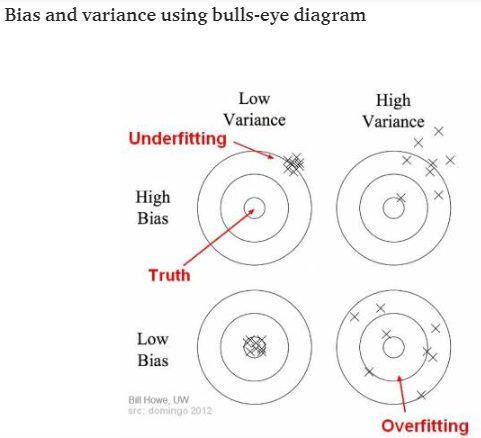


In supervised learning, underfitting happens when a model unable to capture the underlying pattern of the data. These models usually have high bias and low variance. It happens when we have very less amount of data to build an accurate model or when we try to build a linear model with a nonlinear data. Also, these kind of models are very simple to capture the complex patterns in data like Linear and logistic regression.

In supervised learning, overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance. These models are very complex like Decision trees which are prone to overfitting.

Why is Bias Variance Tradeoff?

If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.

Common Types of Ensemble Methods 
Bagging 
    • Reduces variance and increases accuracy 
    • Robust against outliers or noisy data 
    • Often used with Decision Trees (i.e. Random Forest)
Boosting 
    • Also reduces variance and increases accuracy 
    • Not robust against outliers or noisy data 
    • Flexible — can be used with any loss function  
Stacking
    • Used to ensemble a diverse group of strong learners 
    • Involves training a second-level machine learning algorithm called a “metalearner” to learn the optimal combination of the base learners


Bagging: It is parallel learning technique and each sample from training data is having equal prop of getting selected

Boosting:It is sequential learning technique and each sample of training data is given a weight based on learning of previous model for next selection

Models that are typically used in Boosting technique are XGBoost (Extreme Gradient Boosting), GBM (Gradient Boosting Machine), ADABoost (Adaptive Boosting), etc.

for Regression-<br>
1.constructing a regression tree, for any leaf node it will give an average value<br>
2.find error for all observation for all leaf node<br>
3.consider these error as new observation value and build a second tree to minimize error<br>
4.repeat steps for specified no of iteration<br>

For Classification:<br><br>
    1.construct classification tree and for any leaf it give class value<br>
    2.give less weight to accurately classified data and more weight to wrongly classified one<br>


Voting based Ensemble learning: (Stacking)
Voting is one of the most straightforward Ensemble learning techniques in which predictions from multiple models are combined.

In [87]:
# Bagged Decision Trees for Regression

from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection

cart = tree.DecisionTreeRegressor()
cart.fit(X_train,y_train)
print(cart.score(X_test,y_test))
print(cart.score(X_train,y_train))
num_trees = 100
#max_sample=0.5 define that each bag contain 50% of training data
model = BaggingRegressor(base_estimator=cart,max_samples=0.5, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
print(results)

0.5864577190198494
1.0
0.758399830703674
0.9420994470560107
[0.8683586  0.77162963 0.84875001 0.82649164 0.86649991]


In [88]:
# AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor
seed = 7
num_trees = 70
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
print(results.mean())

0.7708323887649144
0.8869553492148392
0.7833998390516759


0.6243402018523732
0.7546035954783757
0.6738570739368674


Text(0,0.5,'Deviance')

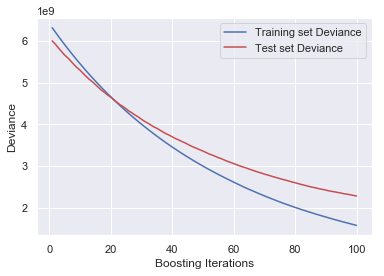

In [96]:
# GradientBoost Regression

from sklearn.ensemble import GradientBoostingRegressor
seed = 7
params={'n_estimators':100,'max_depth':4,'min_samples_split':2,'learning_rate':0.01,'loss':'ls','random_state':seed}
model1= GradientBoostingRegressor(max_depth=4,n_estimators=1,min_samples_split=2,learning_rate=0.01,loss='ls',random_state=seed)
model2 = GradientBoostingRegressor(**params)
results = model_selection.cross_val_score(model2, X_train, y_train, cv=5)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
print(model2.score(X_test,y_test))
print(model2.score(X_train,y_train))
print(results.mean())

#predictions
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

#Plot Training and Test Deviance
test_score=np.zeros((params['n_estimators'],),dtype=np.float64)
for i,y_pred in enumerate(model2.staged_predict(X_test)):
    test_score[i]=model2.loss_(y_test,y_pred)
    
plt.plot(np.arange(params['n_estimators'])+1,model2.train_score_,'b-',label='Training set Deviance')
plt.plot(np.arange(params['n_estimators'])+1,test_score,'r-',label='Test set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

#after boosting iteration 20 the loss of test data is more than loss of training data and model started overfitting

Current size: [12.0, 9.0]


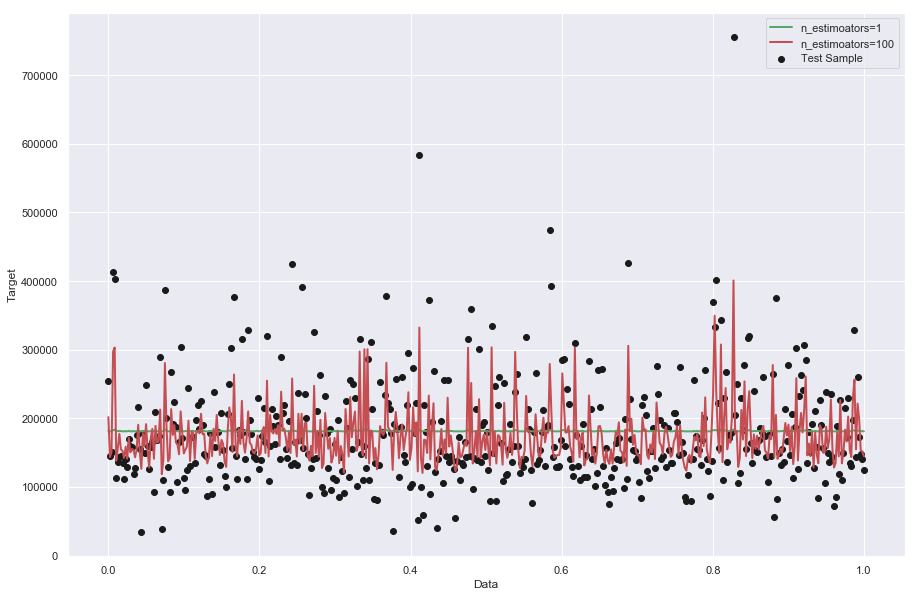

In [102]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [6.0, 4.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#compare final model with intial model
plt.scatter(np.linspace(0, 1, 482, endpoint=True),y_test,c="k",label="Test Sample")
plt.plot(np.linspace(0, 1, 482, endpoint=True),y_pred1,c="g",label="n_estimoators=1",linewidth=2)
plt.plot(np.linspace(0, 1, 482, endpoint=True),y_pred2,c="r",label="n_estimoators=100",linewidth=2)
plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

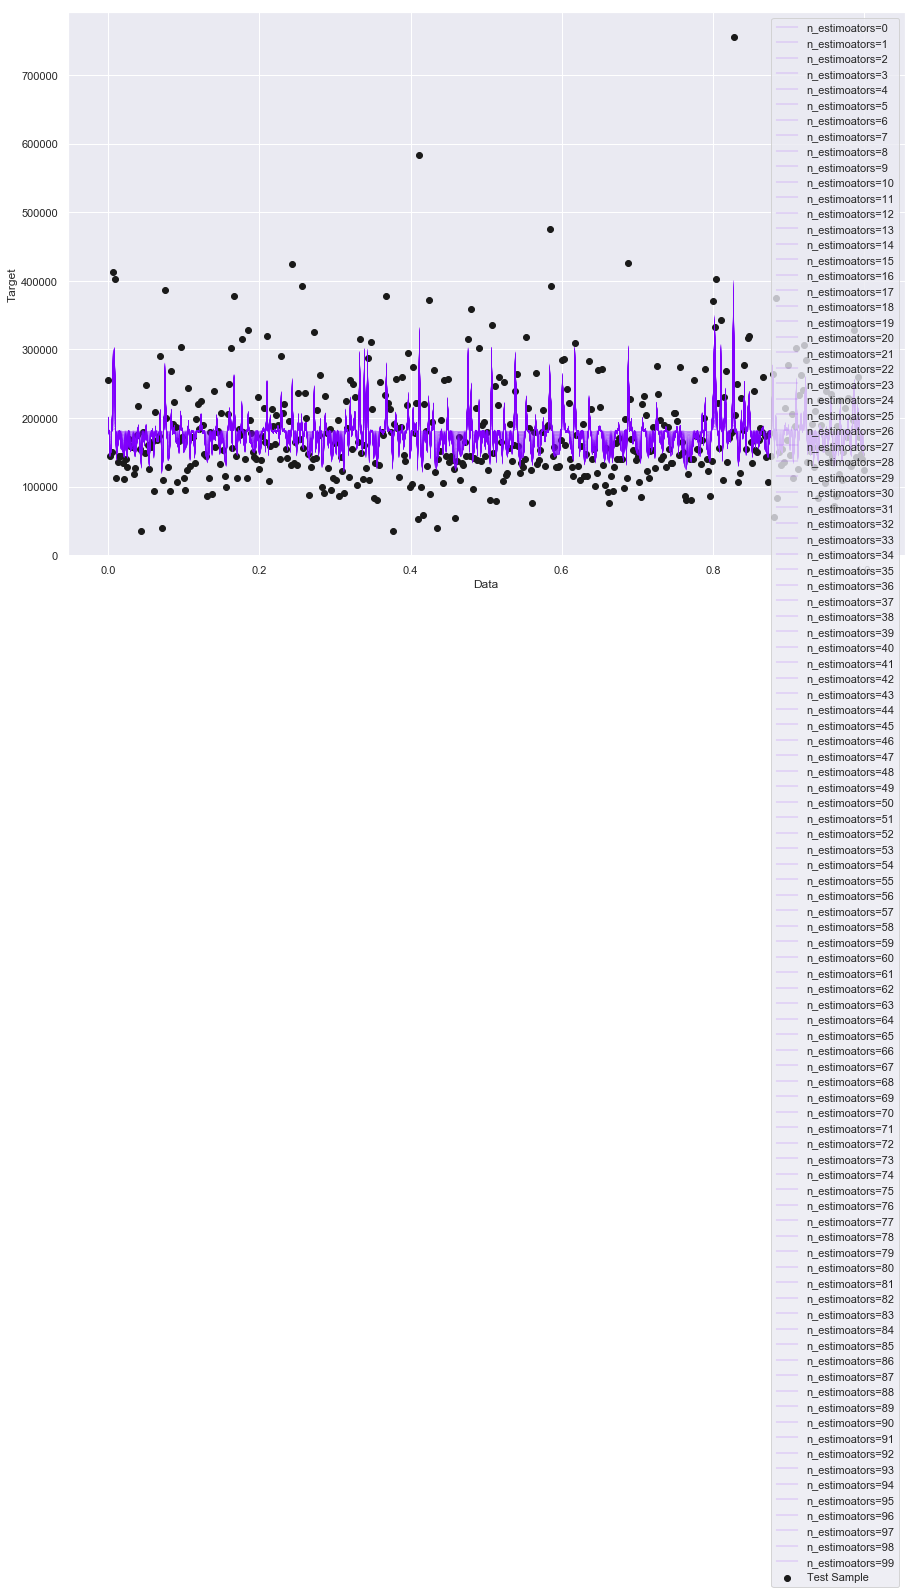

In [106]:
#Iterate through each predicted model and plot them with diffrent color and legend
from matplotlib.pyplot import cm
plt.scatter(np.linspace(0, 1, 482, endpoint=True),y_test,c="k",label="Test Sample")

color=iter(cm.rainbow(np.linspace(0,1,n)))
c=next(color)

for i,pred in enumerate(model.staged_predict(X_test)):
    i=str(i)
    plt.plot(np.linspace(0, 1, 482, endpoint=True),pred,c=c,label="n_estimoators="+i,linewidth=0.2)
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.legend()

In [89]:
# Voting Ensemble for Classification
#Note it will only work with classification problem

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=5)
print(results.mean())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

How Ada Boosting diffrent than Graident Boostimg?
Both AdaBoost (Adaptive Boosting) and Gradient Boosting build weak learners in a sequential fashion. Originally, AdaBoost was designed in such a way that at every step the sample distribution was adapted to put more weight on misclassified samples and less weight on correctly classified samples. The final prediction is a weighted average of all the weak learners, where more weight is placed on stronger learners.
Later, it was discovered that AdaBoost can also be expressed as in terms of the more general framework of additive models with a particular loss function (the exponential loss).
